In [ ]:
#Embedded vectors are those that are lower dimensional than basic count-vectorised arrays,
#but carry more information wrt relationships and similarities of vectors.
#The lower dimensions thus created may not be physically interpretable and not manually assigned.
#They are arrived/derived during training process from existing corpus.
#Word embeddings are dense vector representations of words in a continuous vector space such that words with similar meanings
#are close together in that space.
#Instead of representing words as discrete symbols (like "cat", "dog"),
#embeddings represent them as points in a high-dimensional space where semantic similarity (like “cat” and “kitten”) is captured by mathematical proximity.

#The earliest vectorising technique (which is not actually an embedding technique) is OHE
#Disadvantage of it is that it is larger in dimensions
documents = ["This is the first document.",
          "This document is the second document.",
          "And this is the third one.",
          "Is this the first document?"]
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)
df = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
df

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1


# 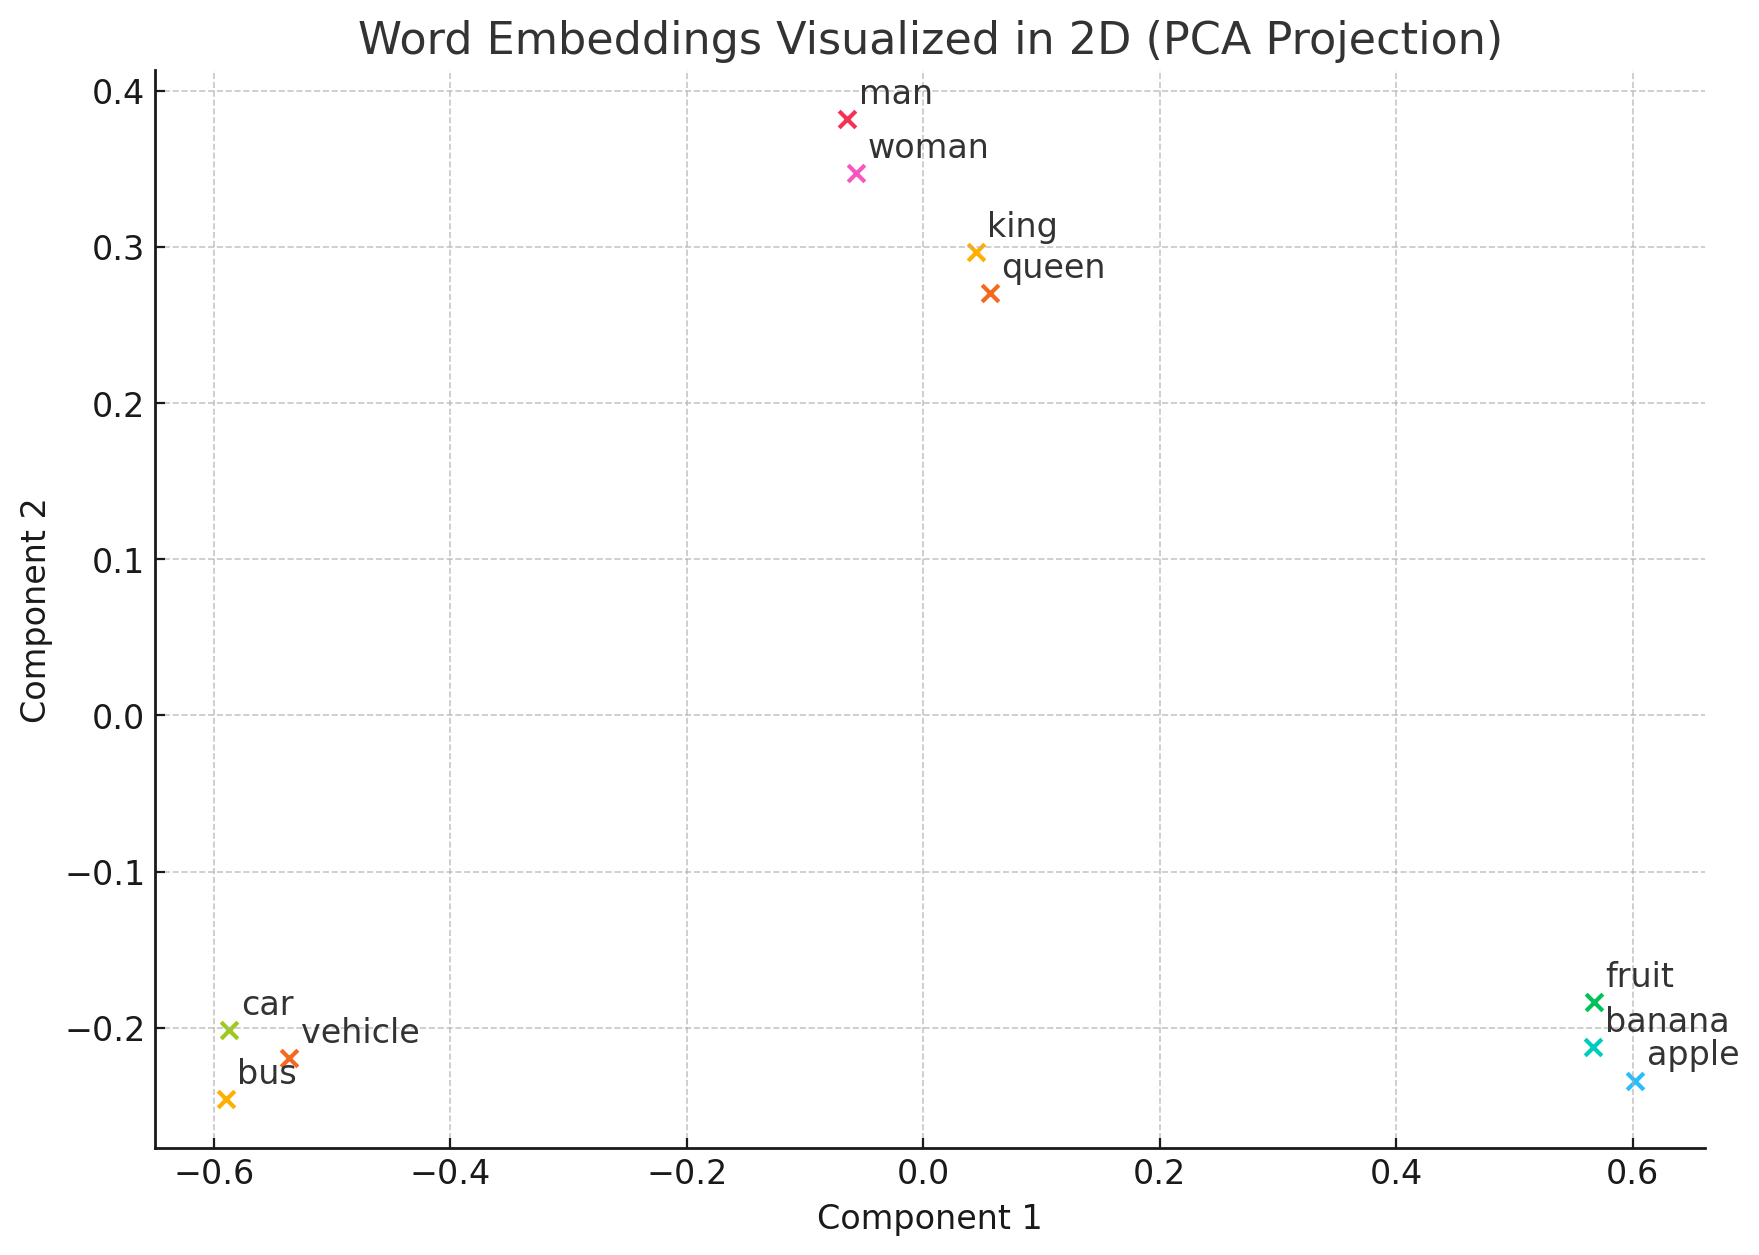

In [ ]:
#!pip install keras
#!pip install tensorflow

#A tensor is just a multi-dimensional array. It's the core data structure in deep learning frameworks like TensorFlow and PyTorch. Everything (inputs, weights, outputs) is stored and computed as tensors.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample text data
text_data = ["This is the first sentence.", "This is probably the second sentence.","Is this the third sentence","Is there a fourth sentence? Or is it not there?","An apple"]
# Create a vocabulary and encode the sentences
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_data)
vocab_size = len(vectorizer.vocabulary_)

# Convert the sparse matrix to a list of sequences (needed for embedding layer)
sequences = X.toarray().tolist()
print("Original raw Sequences:",sequences)

# Pad sequences to have uniform length
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Define the embedding layer
# The first argument is the size of the vocabulary.
# The second argument is the dimension of the embedding space.
# The third argument is the maximum length of the input sequences.
embedding_dim = 4
embedding_layer = Embedding(input_dim=vocab_size + 1, output_dim=embedding_dim) # Add 1 for padding

# Apply the embedding layer
embedded_sequences = embedding_layer(tf.constant(padded_sequences, dtype=tf.int32))

# Print the original padded sequences and the embedded sequences
print("Padded Sequences:")
print(padded_sequences)
print("\nEmbedded Sequences:")
print(embedded_sequences.numpy()) # Convert the tensor to a numpy array for printing

Original raw Sequences: [[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1], [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1], [0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
Padded Sequences:
[[0 0 1 0 1 0 0 0 0 0 1 1 0 0 1]
 [0 0 0 0 1 0 0 0 1 1 1 1 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 1 1 0 1 1]
 [0 0 0 1 2 1 1 1 0 0 1 0 2 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]]

Embedded Sequences:
[[[-0.03478528  0.03127653 -0.04982501 -0.04683661]
  [-0.03478528  0.03127653 -0.04982501 -0.04683661]
  [-0.00917759 -0.02411277  0.01460678  0.02857646]
  [-0.03478528  0.03127653 -0.04982501 -0.04683661]
  [-0.00917759 -0.02411277  0.01460678  0.02857646]
  [-0.03478528  0.03127653 -0.04982501 -0.04683661]
  [-0.03478528  0.03127653 -0.04982501 -0.04683661]
  [-0.03478528  0.03127653 -0.04982501 -0.04683661]
  [-0.03478528  0.03127653 -0.04982501 -0.04683661]
  [-0.03478528  0.03127653 -0.04982501 -0.04683661]
  [-0.00917759 

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts([sent for sent in text_data])

# See the vocabulary
print("Word to index mapping:")
print(tokenizer.word_index)

# Convert sentence to sequence
sequence = tokenizer.texts_to_sequences([sent for sent in text_data])
print("\nTokenized sequence:", sequence)
padded_sequences = pad_sequences(sequence, maxlen=6, padding='post')
print(padded_sequences)


Word to index mapping:
{'is': 1, 'sentence': 2, 'this': 3, 'the': 4, 'there': 5, 'first': 6, 'probably': 7, 'second': 8, 'third': 9, 'a': 10, 'fourth': 11, 'or': 12, 'it': 13, 'not': 14, 'an': 15, 'apple': 16}

Tokenized sequence: [[3, 1, 4, 6, 2], [3, 1, 7, 4, 8, 2], [1, 3, 4, 9, 2], [1, 5, 10, 11, 2, 12, 1, 13, 14, 5], [15, 16]]
[[ 3  1  4  6  2  0]
 [ 3  1  7  4  8  2]
 [ 1  3  4  9  2  0]
 [ 2 12  1 13 14  5]
 [15 16  0  0  0  0]]


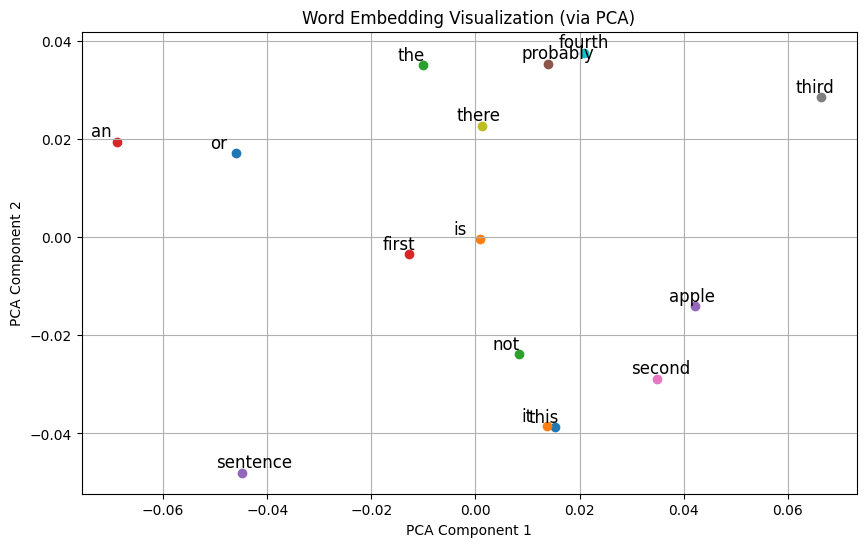

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

embedding_matrix = embedding_layer.get_weights()[0]  # shape: (vocab_size + 1, embedding_dim)
word_to_index = vectorizer.vocabulary_
index_to_word = {v: k for k, v in word_to_index.items()}
pca = PCA(n_components=2)
reduced = pca.fit_transform(embedding_matrix)
plt.figure(figsize=(10, 6))
for index, word in index_to_word.items():
    x, y = reduced[index]  # index starts from 0
    plt.scatter(x, y)
    plt.text(x-0.005, y + 0.001, word, fontsize=12)

plt.title("Word Embedding Visualization (via PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


In [ ]:
from keras.datasets import imdb
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000)
print(type(x_train))
print(x_train.shape)
print(type(x_train[0]))
print(x_train[0])
print(len(x_train[0]))
print(len(x_train[1]))
print(len(x_train[2]))

<class 'numpy.ndarray'>
(25000,)
<class 'list'>
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218
189
141


In [ ]:
# from keras.preprocessing.sequence import pad_sequences
from keras import preprocessing
from keras.utils import pad_sequences
x_train = pad_sequences(x_train,maxlen=8000)
x_test = pad_sequences(x_test,maxlen=8000)
print(len(x_train))
print(len(x_train[0]))
print(len(x_train[1]))
print(len(x_train[2]))
print(len(x_train[24999]))

25000
8000
8000
8000
8000


In [ ]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Embedding

model = Sequential()
model.add(Embedding(10000,8))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])
history = model.fit(x_train,y_train,epochs = 3,verbose=1,validation_split=0.2)

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.6359 - loss: 0.6162 - val_accuracy: 0.8748 - val_loss: 0.3190
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.8966 - loss: 0.2631 - val_accuracy: 0.8856 - val_loss: 0.2739
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.9334 - loss: 0.1865 - val_accuracy: 0.8838 - val_loss: 0.2781


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (32, 8000, 8)          │        80,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 64000)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 1)                │        64,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 432,005 (1.65 MB)

 Trainable params: 144,001 (562.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 288,004 (1.10 MB)

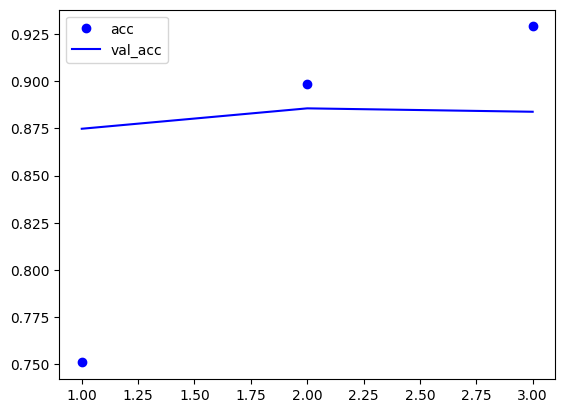

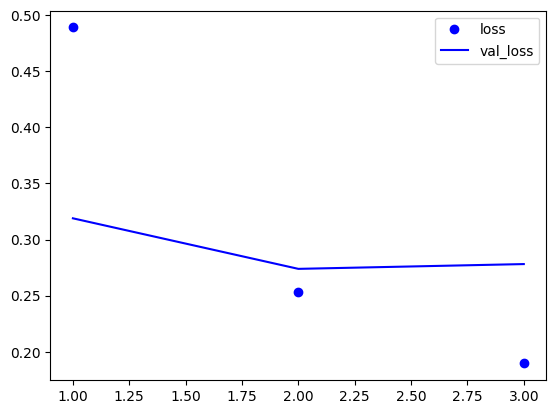

In [ ]:
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='acc')
plt.plot(epochs,val_acc,'b',label='val_acc')
plt.legend()

plt.figure()
plt.plot(epochs,loss,'bo',label='loss')
plt.plot(epochs,val_loss,'b',label='val_loss')
plt.legend()

plt.show()

In [ ]:
#Word2Vec - Word2Vec is a neural network model that learns dense vector representations (embeddings) of words by predicting context.
#We implement Word vectorization technique using pretrained models. Avg Word2Vec vectorizes sentence as a whole
#!pip install gensim
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')
corpus = ["You are good","I like you","This world is beautiful"]
tokenize_sen = [word_tokenize(i) for i in corpus]
model = Word2Vec(tokenize_sen,min_count=1)
model

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
model.wv['You']

array([-0.00515624, -0.00666834, -0.00777684,  0.00831073, -0.00198234,
       -0.00685496, -0.00415439,  0.00514413, -0.00286914, -0.00374966,
        0.00162143, -0.00277629, -0.00158436,  0.00107449, -0.00297794,
        0.00851928,  0.00391094, -0.00995886,  0.0062596 , -0.00675425,
        0.00076943,  0.00440423, -0.00510337, -0.00211067,  0.00809548,
       -0.00424379, -0.00763626,  0.00925791, -0.0021555 , -0.00471943,
        0.0085708 ,  0.00428334,  0.00432484,  0.00928451, -0.00845308,
        0.00525532,  0.00203935,  0.00418828,  0.0016979 ,  0.00446413,
        0.00448629,  0.00610452, -0.0032021 , -0.00457573, -0.00042652,
        0.00253373, -0.00326317,  0.00605772,  0.00415413,  0.00776459,
        0.00256927,  0.00811668, -0.00138721,  0.00807793,  0.00371702,
       -0.00804732, -0.00393361, -0.00247188,  0.00489304, -0.00087216,
       -0.00283091,  0.00783371,  0.0093229 , -0.00161493, -0.00515925,
       -0.00470176, -0.00484605, -0.00960283,  0.00137202, -0.00

In [ ]:
text = """Word2Vec is a technique for natural language processing.
It represents words as numerical vectors and captures semantic relationships.
"""
words = word_tokenize(text.lower())
print(words)

['word2vec', 'is', 'a', 'technique', 'for', 'natural', 'language', 'processing', '.', 'it', 'represents', 'words', 'as', 'numerical', 'vectors', 'and', 'captures', 'semantic', 'relationships', '.']


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
words_final = [word for word in words if word not in stop_words]
print(words_final)

['word2vec', 'technique', 'natural', 'language', 'processing', '.', 'represents', 'words', 'numerical', 'vectors', 'captures', 'semantic', 'relationships', '.']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Train the Word2Vec model
model1 = Word2Vec(
    sentences=[words],
    vector_size=20,  # Size of word vectors
    window=5,         # Context window size
    min_count=1,      # Ignore words with frequency lower than this
    sg=1              # 1 for Skip-Gram, 0 for CBOW
)
#model1
# Access the vector for a word
model1.wv['word2vec']
#model1.wv['natural']

array([ 0.00139158,  0.02482179,  0.03849155, -0.00572112,  0.0216171 ,
       -0.0290719 , -0.00402095,  0.04050025, -0.01180032, -0.04831728,
        0.0288963 , -0.01964911, -0.00611436,  0.04990259, -0.01128175,
       -0.02378532, -0.02664694,  0.03490445, -0.02854436,  0.01056832],
      dtype=float32)

In [ ]:
model1.wv.most_similar('word2vec', topn=5)

[('for', 0.5349889993667603),
 ('.', 0.46582597494125366),
 ('vectors', 0.19725723564624786),
 ('represents', 0.19008029997348785),
 ('captures', 0.12203126400709152)]

In [ ]:
from gensim.utils import simple_preprocess
text_data = ["This is the first sentence.", "This is probably the second sentence.","Is this the third sentence","Is there a fourth sentence? Or is it not there?","An apple"]
processed_data = [simple_preprocess(doc) for doc in text_data]
model = Word2Vec(sentences=processed_data, vector_size=20, window=5, min_count=1, sg=0)

# Get the word vector for a specific word
word_vector = model.wv['sentence']
print("Vector for 'sentence':", word_vector)

# Find the most similar words
similar_words = model.wv.most_similar('sentence')
print("Words most similar to 'sentence':", similar_words)

# Get the vocabulary
vocabulary = list(model.wv.index_to_key)
print("Vocabulary:", vocabulary)

# Get the vector for all words in the vocabulary
all_word_vectors = model.wv[vocabulary]
print("Shape of all word vectors:", all_word_vectors.shape)

Vector for 'sentence': [ 0.03655222  0.02535726  0.03378161  0.0038135   0.03175628 -0.01702492
 -0.00473691  0.02884757 -0.03760865 -0.0196708  -0.03756487 -0.00464918
  0.04769249 -0.03659539 -0.01165688 -0.00969299  0.04038766 -0.02965833
  0.00022116 -0.02376247]
Words most similar to 'sentence': [('fourth', 0.2541954517364502), ('this', 0.1524016559123993), ('probably', 0.128170907497406), ('or', 0.07648012787103653), ('second', 0.07288141548633575), ('apple', 0.06166244298219681), ('is', 0.05011240020394325), ('first', 0.04801055043935776), ('an', 0.028594231233000755), ('third', -0.10701362043619156)]
Vocabulary: ['is', 'sentence', 'the', 'this', 'there', 'apple', 'an', 'not', 'it', 'or', 'fourth', 'third', 'second', 'probably', 'first']
Shape of all word vectors: (15, 20)


In [ ]:
import numpy as np
# Function to compute average Word2Vec
def average_word2vec(sentence, model):
    words = sentence.split()  # Split sentence into words
    vectors = [model.wv[word] for word in words if word in model.wv]  # Get vectors for valid words
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# List of sentences
sentences = ['You are good and beautiful', 'I like you', 'This world is beautiful']

# Compute average Word2Vec for all sentences
sentence_vectors = [average_word2vec(sentence, model) for sentence in sentences]

In [ ]:
sentence_vectors

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([-0.00268114,  0.00118216,  0.02551675,  0.04504637, -0.04651475,
        -0.03558404,  0.03229436,  0.04486494, -0.02507714, -0.01881686,
         0.03690252, -0.00766736, -0.02268307,  0.03277026, -0.0243008 ,
        -0.00908009,  0.0143829 ,  0.00495937, -0.04142607, -0.04724409],
       dtype=float32)]

In [ ]:
#Avg word2vec is done using basic count vectorizing, and hence we are taking simple average. Here using tf-idf, we take weighted average of wv, weights being idf of each word
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

# Sample corpus
sentences = [
    "This is the first document",
    "This document is the second document",
    "And this is the third one",
    "Is this the first document",
    "Word embeddings are useful for NLP tasks"
]

# Preprocess and tokenize
tokenized_sentences = [sentence.lower().split() for sentence in sentences]

# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_sentences, vector_size=20, window=5, min_count=1, sg=1)

# Fit TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit([" ".join(s) for s in tokenized_sentences])
tfidf_vocab = tfidf_vectorizer.vocabulary_
idf_weights = tfidf_vectorizer.idf_

# Create a mapping of word to IDF
word2idf = {word: idf_weights[idx] for word, idx in tfidf_vocab.items()}

# Function: compute TF-IDF weighted average Word2Vec
def tfidf_avg_w2v(sentence_tokens, w2v_model, word2idf):
    vector_size = w2v_model.vector_size
    weighted_vecs = []
    for word in sentence_tokens:
        if word in w2v_model.wv and word in word2idf:
            weighted_vecs.append(w2v_model.wv[word] * word2idf[word])
    if not weighted_vecs:
        return np.zeros(vector_size)
    return np.mean(weighted_vecs, axis=0)

# Compute vector for each sentence
sentence_vectors = []
for tokens in tokenized_sentences:
    vec = tfidf_avg_w2v(tokens, w2v_model, word2idf)
    sentence_vectors.append(vec)

# Example: print vector for first sentence
print("Sentence:", " ".join(tokenized_sentences[0]))
print("TF-IDF Weighted Avg Word2Vec vector:")
print(sentence_vectors[0])


Sentence: this is the first document
TF-IDF Weighted Avg Word2Vec vector:
[-0.00677674  0.01741382  0.00906197  0.01123217 -0.01705066 -0.00830747
  0.00816517  0.02922257 -0.01856156  0.01515883  0.00106079  0.01225289
  0.00417658 -0.0089867   0.02191224 -0.00087059  0.01264004 -0.02652858
 -0.01738254 -0.00731339]
